# Financial Exploratory Data Analysis

Exploratory analysis of bank stock prices and their progression throughout the financial crisis up to early 2016.   

### The Imports

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

### About The Data

Using Google finance and pandas datareader, stock data from Jan 1, 2006 to Jan 1,2016 was collected for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Data Processing

In [10]:
# Create start and end variables
start= datetime.datetime(2000,1,1)
end = datetime.datetime(2021,1,1)

In [11]:
# Bank of America
BAC = data.DataReader('BAC','yahoo',start,end)

# CitiGroup
C = data.DataReader('C','yahoo',start,end)

# Goldman Sachs
GS = data.DataReader('GS','yahoo', start,end)

# JP Morgman Chase
JPM = data.DataReader('JPM', 'yahoo', start,end)

# Morgan Stanley
MS = data.DataReader('MS','yahoo',start,end)

# Wells Fargo
WFC = data.DataReader('WFC','yahoo', start,end)

** Create a list of the ticker symbols (as strings) in alphabetical order called tickers**

In [12]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks and set keys argument equal to the tickers list**

In [13]:
bank_stocks = pd.concat([BAC,C,GS,JPM, MS, WFC], axis = 1, keys = tickers)

** Set the column name levels**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [17]:
bank_stocks.size

190260

** Check the head of the bank_stocks dataframe.**

In [18]:
bank_stocks.head()

Bank Ticker       BAC                                                       \
Stock Info       High       Low      Open     Close      Volume  Adj Close   
Date                                                                         
1999-12-31   25.46875  25.00000  25.28125  25.09375   5287600.0  14.527933   
2000-01-03   25.12500  24.00000  25.12500  24.21875  13705800.0  14.021359   
2000-01-04   23.96875  22.46875  23.87500  22.78125  27293400.0  13.189125   
2000-01-05   23.21875  22.25000  22.53125  23.03125  22855600.0  13.333860   
2000-01-06   25.00000  23.37500  23.46875  25.00000  17307000.0  14.473662   

Bank Ticker          C                                  ...       MS  \
Stock Info        High       Low       Open      Close  ...     Open   
Date                                                    ...            
1999-12-31   419.53125  411.5625  414.37500  417.65625  ...  70.6250   
2000-01-03   417.18750  390.0000  417.18750  397.50000  ...  68.6250   
2000-01-04   391.40625  373.1250  390.00000  373.12500  ...  66.0000   
2000-01-05   390.00000  371.2500  381.56250  388.12500  ...  62.0000   
2000-01-06   410.15625  384.3750  384.84375  406.87500  ...  60.1875   

Bank Ticker                                       WFC                      \
Stock Info      Close     Volume  Adj Close      High       Low      Open   
Date                                                                        
1999-12-31   71.37500   570000.0  40.762043  20.31250  20.06250  20.28125   
2000-01-03   67.50000  5309000.0  38.549049  20.18750  19.00000  20.15625   
2000-01-04   62.50000  6234400.0  35.693558  18.84375  18.00000  18.62500   
2000-01-05   60.21875  7744200.0  34.390747  18.87500  18.03125  18.50000   
2000-01-06   61.37500  6586000.0  35.051071  19.50000  18.46875  18.53125   

Bank Ticker                                   
Stock Info      Close      Volume  Adj Close  
Date                                          
1999-12-31   20.21875   2356800.0  11.189585  
2000-01-03   19.56250   9037000.0  10.826397  
2000-01-04   18.59375  15237200.0  10.290268  
2000-01-05   18.40625   8228200.0  10.186500  
2000-01-06   19.21875   8326800.0  10.636159  

[5 rows x 36 columns]

# Exploratory Data Analysis

** What is the max Close price for each bank's stock throughout the time period?**

In [19]:
# For loop
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 588.75
GS 273.3800048828125
JPM 141.08999633789062
MS 109.375
WFC 65.93000030517578


In [20]:
# Access method
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      588.750000
GS     273.380005
JPM    141.089996
MS     109.375000
WFC     65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [21]:
# Empty dataframe
returns = pd.DataFrame()

**Create a for loop that creates a return column for each Stock Ticker and sets it as a column in the returns DataFrame using pct_change method(). **

In [22]:
for tick in tickers:
   returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [23]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.034869,-0.048260,-0.062376,-0.061947,-0.054291,-0.032457
2000-01-04,-0.059355,-0.061321,-0.062987,-0.027444,-0.074074,-0.049521
2000-01-05,0.010974,0.040201,-0.046828,-0.006173,-0.036500,-0.010084
2000-01-06,0.085482,0.048309,0.042789,0.014197,0.019201,0.044143


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

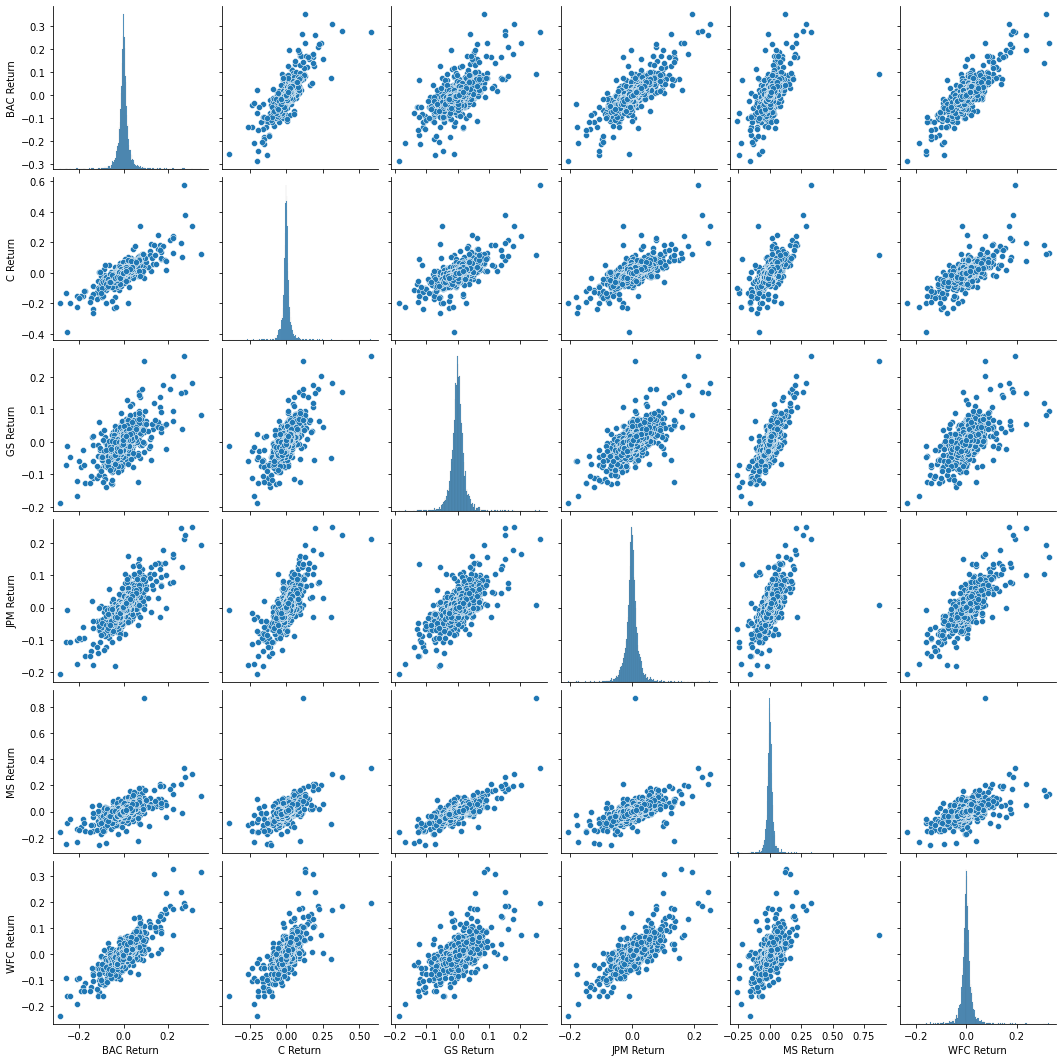

In [24]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [25]:
# Worst single day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [26]:
# Best single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [27]:
# Calucate standard deviations
returns.std()

BAC Return    0.029141
C Return      0.031086
GS Return     0.023639
JPM Return    0.024831
MS Return     0.031765
WFC Return    0.024703
dtype: float64

In [28]:
# Calculate standard deviations for 2015 only
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [31]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.034869,-0.048260,-0.062376,-0.061947,-0.054291,-0.032457
2000-01-04,-0.059355,-0.061321,-0.062987,-0.027444,-0.074074,-0.049521
2000-01-05,0.010974,0.040201,-0.046828,-0.006173,-0.036500,-0.010084
2000-01-06,0.085482,0.048309,0.042789,0.014197,0.019201,0.044143
...,...,...,...,...,...,...
2020-12-24,-0.002995,-0.003455,-0.001131,-0.004398,-0.001759,-0.016804
2020-12-28,0.005674,0.009246,0.013390,0.006585,-0.000587,0.003016
2020-12-29,-0.003983,-0.003599,-0.006086,-0.002633,-0.004996,-0.005012


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

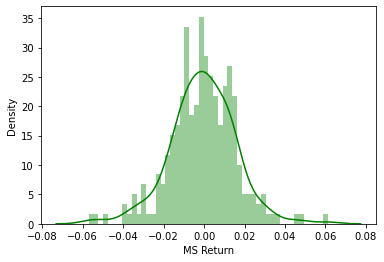

In [34]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'green', bins =50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

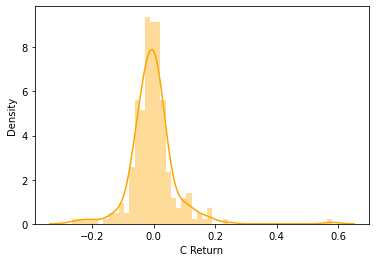

In [35]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'orange', bins = 50)

____
# More Visualization

### Imports

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time using a for loop or .xs**

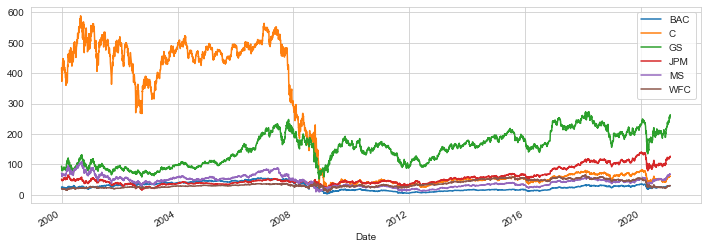

In [39]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

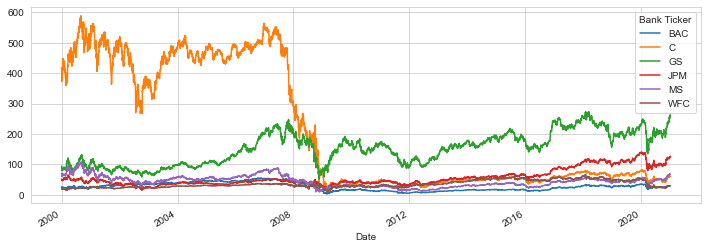

In [40]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

## Moving Averages

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Text(0.5, 1.0, '30 Day Moving Average v Actual Closing Price')

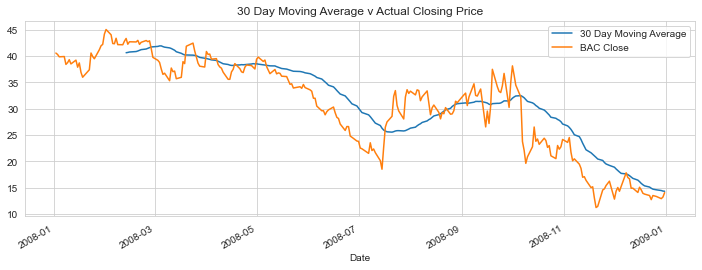

In [42]:
plt.figure(figsize =(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 Day Moving Average' )
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()
plt.title('30 Day Moving Average v Actual Closing Price')

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

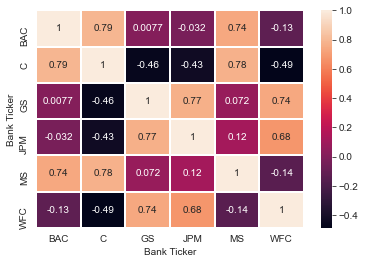

In [43]:
# Create heatmap
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True,lw = 1)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

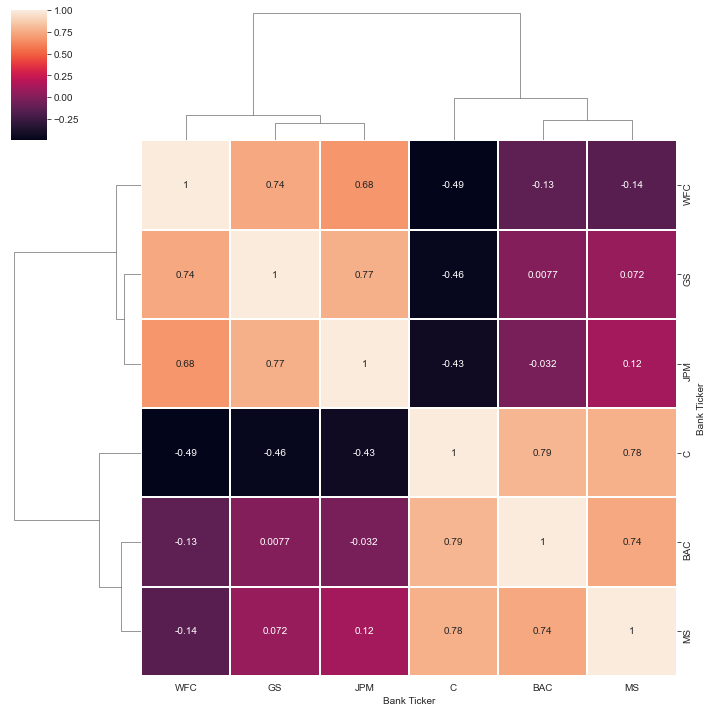

In [44]:
# Create cluter map
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, lw = 1)

close_corr = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

# Techincal Financial Analysis


** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')